# Step 2: Computation

## Category 3: Principal Components

In [23]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [24]:
def eig_decomp(Sigma):
    Phi = np.linalg.eigh(Sigma)[1][:, ::-1]
    Lambda = np.diag(np.linalg.eigh(Sigma)[0][::-1])
    return Phi, Lambda

This function takes a covariance matrix **Sigma** and computes its eigenvalues and eigenvectors. Eigenvalues and eigenvectors are sorted in descending order to prioritize the principal components that explain the most variance.

Returns:

* $\Large \Phi:$ Eigenvectors of $\Sigma$ sorted in descending order of their corresponding eigenvalues.
* $\Large \Lambda:$ Diagonal matrix of eigenvalues  of $\Sigma$ sorted in descending order.

such that

$\Large \Sigma = \Phi \Lambda \Phi^T$

In [25]:
def manual_PCA(X, min_perc_var=0.80):
    X_st = (X - X.mean(axis=0))
    Sigma = np.cov(X_st.T)
    Phi, Lambda = eig_decomp(Sigma)
    perc_var = np.diagonal(Lambda).cumsum() / np.diagonal(Lambda).sum()
    print("perc_var:", perc_var)
    num_pc = np.where(perc_var > min_perc_var)[0][0] + 1  # Pick the first k eigenvectors
    Phi_reduced = Phi[:, :num_pc]  # P_reduced.shape = (d, k)

    X_PCA = (Phi_reduced.T @ X_st.T).T  # X_PCA.shape = (n, k)
    return Phi_reduced, X_PCA

This function performs Principal Component Analysis (PCA) on a dataset to reduce its dimensionality while retaining a specified percentage of the total variance.

* Centers the data by subtracting the mean of each feature.
* Computes the covariance matrix of the centered data.
* Performs eigen decomposition to obtain principal components and their corresponding variances.
* The cumulative variance explained by the principal components is calculated using the cumulative sum of the eigenvalues divided by the total variance.
* Determines the number of principal components needed to retain at least min_perc_var (default 80%) of the total variance.
* Projects the original data onto the selected principal components to obtain the reduced-dimensionality representation.

Returns:

* **Phi_reduced:** The reduced matrix containing the selected principal components.
* **X_PCA:** The data projected onto the principal components, representing the reduced-dimensionality dataset.

A simple example usage for **manual_PCA** function:

In [26]:
Mu = np.array([0.1, -0.1, 0.5])
Sigma = np.array([
    [1, 2.5, -3.5],
    [2.5, 1, 0],
    [-3.5, 0, 1]
])
n = 1000

X = np.random.multivariate_normal(Mu, Sigma, n)

Phi_reduced, X_PCA = manual_PCA(X, 0.8)
print("X.shape =", X.shape)
print("X_PCA.shape =", X_PCA.shape)  # dimension reduced from 3 to 2
print("Phi_reduced.shape =", Phi_reduced.shape)

perc_var: [0.55093617 0.89876983 1.        ]
X.shape = (1000, 3)
X_PCA.shape = (1000, 2)
Phi_reduced.shape = (3, 2)


C:\Users\adevr\AppData\Local\Temp\ipykernel_13064\3765093984.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(Mu, Sigma, n)


By reducing the data from 3 dimensions to 2, PCA retains the directions that capture the most variance in the data, thus improving the dimensionality of the data and reducing noise.

Now let's look at the visualization of PCA in 2-d vector space:

In [27]:
def plot_2d_PCA(X):
    X_st = (X - X.mean(axis=0))
    Sigma = np.cov(X_st.T)
    Phi, Lambda = eig_decomp(Sigma)
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
    scale = np.diagonal(Lambda) / np.diagonal(Lambda).sum()
    colors = cm.seismic(np.linspace(0, 1, Phi.shape[1]))
    for j in range(Phi.shape[1]):
        plt.quiver(*np.array([0, 0]), *Phi[:, j], angles='xy', scale_units='xy', scale=1-scale[j], color=colors[j], label=f'PCA {j+1}')
    plt.legend()
    plt.show()

This function provides an implementation of Principal Component Analysis (PCA) and visualizes the principal components on a 2D scatter plot of the data. It shows arrows originating from the origin, indicating the directions of maximum variance in the data. The length of each arrow corresponds to the amount of variance it explains, with longer arrows representing higher variance.

In our example, you can clearly see that the larget principal component **(PCA 1)** is pointing at the direction of the covariance (45 degree angle). Moreover, we can see that all principal components are **orthogonal** to each other, as expected from the eigenvectors of symmetric matrices:

C:\Users\adevr\AppData\Local\Temp\ipykernel_13064\2131891385.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(Mu, Sigma, n)


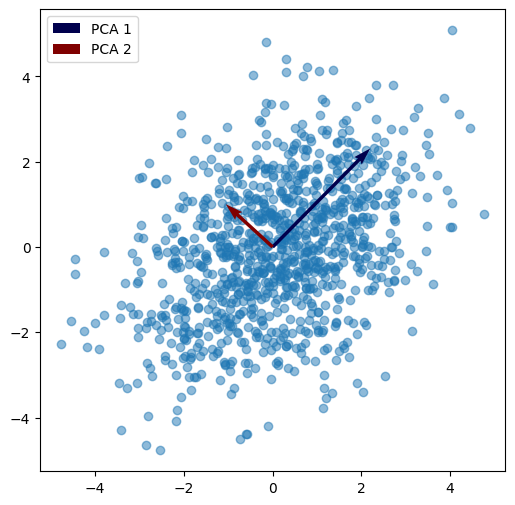

In [28]:
Mu = np.array([0.1, -0.1])
Sigma = np.array([
    [1, 2.5],
    [2.5, 1],
])
n = 1000

X = np.random.multivariate_normal(Mu, Sigma, n)

plot_2d_PCA(X)